In [1]:
import functions
import networkx as nx
import numpy as np
import osmnx as ox

/home/jdiego/anaconda3/envs/ox/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '22-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


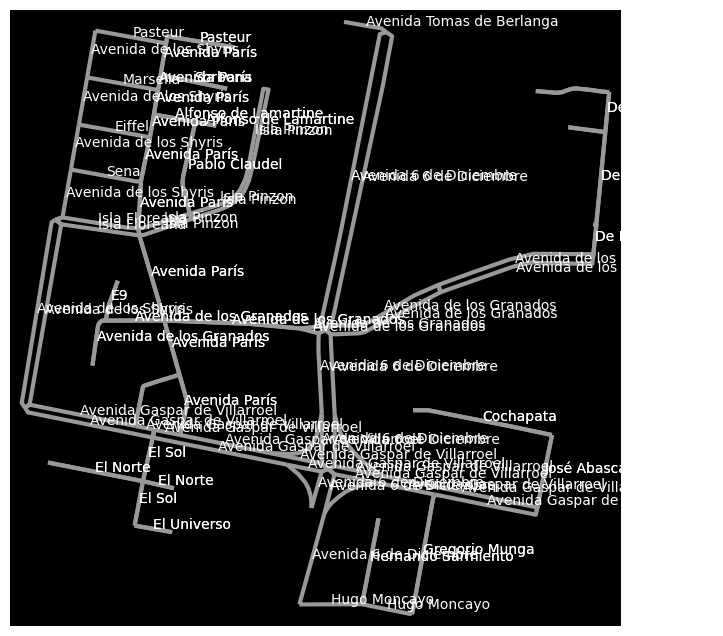

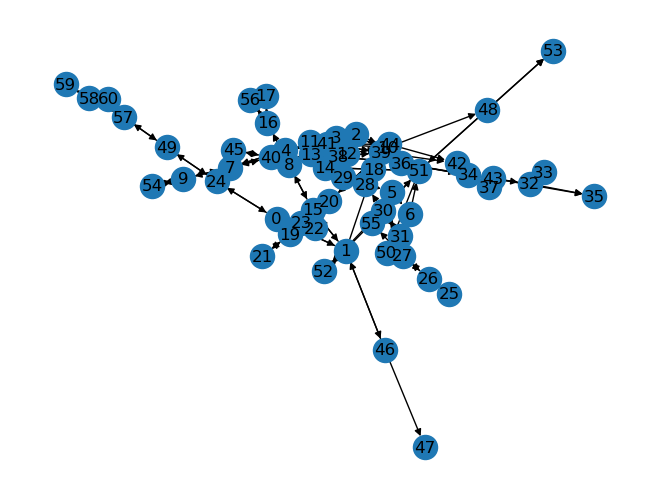

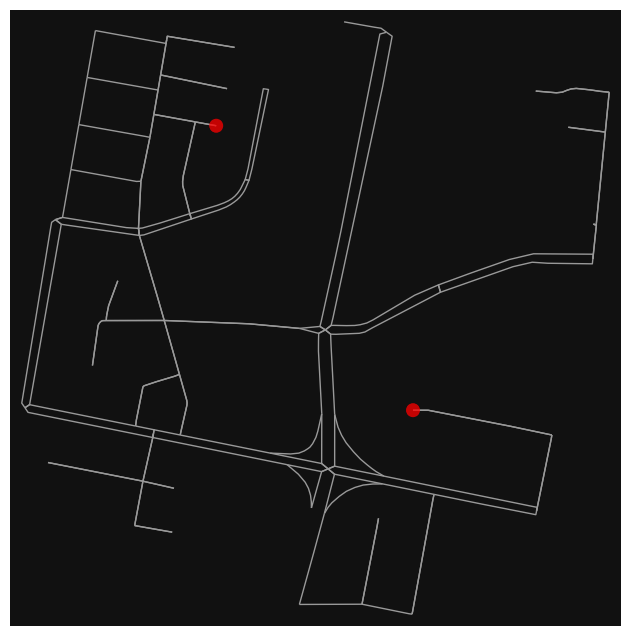

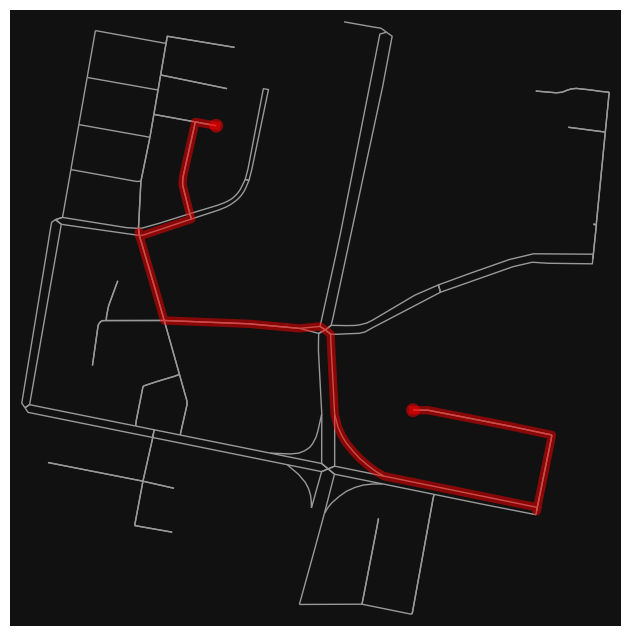

In [12]:
# Get the map 
G3 = functions.get_node(-0.16916, -78.47632, 400)

# plot the netwrok
nx.draw(G3, with_labels=True)

# Ploting just the nodes  
route0_G3 = nx.shortest_path(G3, 25, 25)
route1_G3 = nx.shortest_path(G3, 45, 45)
#route2_G3 = nx.shortest_path(G3, 26, 26)
#route3_G3 = nx.shortest_path(G3, 27, 27)
#route4_G3 = nx.shortest_path(G3, 55, 55)
#route5_G3 = nx.shortest_path(G3, 52, 52)
#route6_G3 = nx.shortest_path(G3, 1, 1)
routes_G3 = [route0_G3 , route1_G3]#,route2_G3,route3_G3,route4_G3,route5_G3,route6_G3]

fig, ax = ox.plot_graph_routes(G3, routes_G3, route_linewidth=6, node_size=0)

# plot route from node 2 to node 10 
route00_G3 = nx.shortest_path(G3, 25, 45)  # 25-45 ya salio

#Plot routes  
fig, ax = ox.plot_graph_route(G3, route00_G3, route_linewidth=6, node_size=0)

In [13]:
# def simulation function 

# get list of nodes 
list_nodes = list(G3.nodes)

# get dictionary with geocordinates of each of the nodes 

coordiantes = functions.get_geo_coordinates( G3 )

# defining initial and final node
initial_node = list_nodes[25]
final_node = list_nodes[45]

# loop to finde the path: 

node_i = initial_node 

# to store the route:
route = {}

path = []

while node_i != final_node:
    
    # measure the angle and distnac between the node_i and the destination node
    angle_i = functions.get_angle( coordiantes[ node_i ], coordiantes[ final_node] )
    dist_i = functions.get_distance( coordiantes[ node_i ], coordiantes[ final_node] ) 

    # get the neighbours of the node. The neighbours are directed nodes
    neighbors = list(G3.neighbors(node_i))
    #print("estoy en el nodo " , node_i , "mis vecinos son:  ", neighbors)


    # get probality of pick a given neighbour
    factors2 = {}

    if len(neighbors) == 0:

        # check if there is no exit
        print("no hay salida")

        # store no exit node in routes
        route[node_i] = {}

        # store the id of node without exit 
        no_exit_node = node_i

        # update node to the previous one 
        node_i = routes[-1]

        # update the  neighbours of the node. The neighbours are directed nodes
        neighbors = list(G3.neighbors(node_i))
        print("regreso al nodo", node_i, "con vecinos" , neighbors)

        # check in node with no exit is in routes list
        routes_b = list(route.keys())

        if no_exit_node in routes_b:
            route[node_i][no_exit_node] = 0
            neighbors.remove(no_exit_node)
            print(neighbors)
            #print(proba_dic)
    

    # store all nodes the agent pass through: 
    path.append(node_i)

    for node in neighbors :
        # measure angle and dist of neighbors towards final node 
        angle_neighbor = functions.get_angle( coordiantes[ node ], coordiantes[ final_node] )
        dist_neighbor = functions.get_distance( coordiantes[ node ], coordiantes[ final_node] )

        # calculate the probability of picking a node 
        factors2[node] = functions.get_factor(dist_neighbor , angle_neighbor , dist_i , angle_i )

    # get probabilities
    proba_dic = functions.get_probability(factors2)

    print("estoy en el nodo  ", node_i, " mis opciones son : ", proba_dic)

    # add to route:
    route[node_i] = proba_dic

    # store route: 
    routes= list(route.keys())

    # check if working 
    for neighbor in neighbors:
        if neighbor in routes:
            print("ya pase por " , neighbor, "hay que cambiar su probabilidad")
            print(" su probabilidad pasada es:" , route[node_i][neighbor])
            print(" su probabilidad se acuatlizara de: ", proba_dic[neighbor] , "a", route[node_i][neighbor]*0.2)
            route[node_i][neighbor]= route[node_i][neighbor]*0.2
            proba_dic[neighbor]  = route[node_i][neighbor]
            print("actualizado: " , route[node_i])


    # ge the node id with max probability
    node_id = max(proba_dic , key= proba_dic.get)

    # get the max probability    
    Proba = proba_dic[node_id]
        
    print("yendo al nodo  " , node_id, "con probabilidad " , Proba )

    # update position
    node_i = node_id

estoy en el nodo   25  mis opciones son :  {26: 1.0}
yendo al nodo   26 con probabilidad  1.0
estoy en el nodo   26  mis opciones son :  {25: 0.6722091319287767, 27: 0.3277908680712231}
ya pase por  25 hay que cambiar su probabilidad
 su probabilidad pasada es: 0.6722091319287767
 su probabilidad se acuatlizara de:  0.6722091319287767 a 0.13444182638575536
actualizado:  {25: 0.13444182638575536, 27: 0.3277908680712231}
yendo al nodo   27 con probabilidad  0.3277908680712231
estoy en el nodo   27  mis opciones son :  {26: 0.42571887191845525, 55: 0.5742811280815447}
ya pase por  26 hay que cambiar su probabilidad
 su probabilidad pasada es: 0.42571887191845525
 su probabilidad se acuatlizara de:  0.42571887191845525 a 0.08514377438369106
actualizado:  {26: 0.08514377438369106, 55: 0.5742811280815447}
yendo al nodo   55 con probabilidad  0.5742811280815447
estoy en el nodo   55  mis opciones son :  {52: 0.574591130505872, 51: 0.42540886949412815}
yendo al nodo   52 con probabilidad  0.57

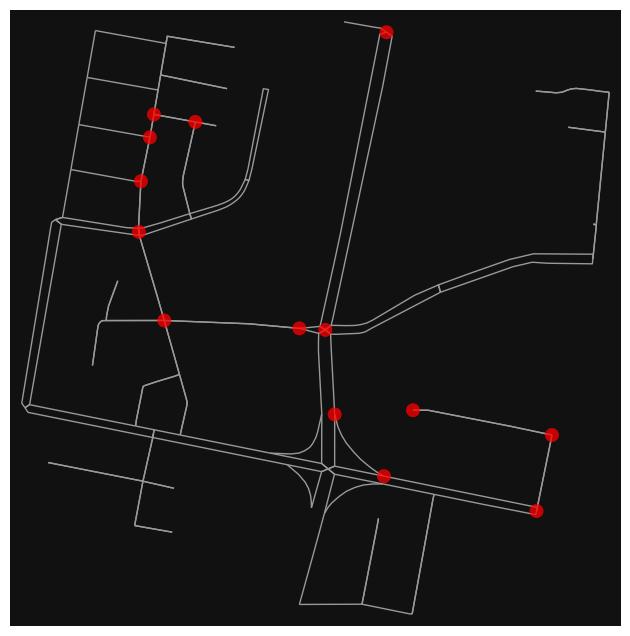

In [14]:
route
routes_g = []
for n in list(route.keys()):
    if len(route[n]) > 0:
        route_G = nx.shortest_path(G3, n, n)
        routes_g.append(route_G)

fig, ax = ox.plot_graph_routes(G3, routes_g, route_linewidth=6, node_size=0)

In [15]:
print(routes)
print(path)

[25, 26, 27, 55, 52, 1, 46, 47, 15, 8, 4, 41, 39, 38, 40]
[25, 26, 27, 55, 52, 1, 46, 46, 1, 15, 8, 4, 41, 39, 38, 40]
